## Chương 11

### 1. Khởi tạo và khai báo thư viện

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345) # Thiết lập seed cho numpy để tái tạo kết quả
import matplotlib.pyplot as plt # Thư viện vẽ biểu đồ
plt.rc("figure", figsize=(10, 6)) # Thiết lập kích thước biểu đồ mặc định
PREVIOUS_MAX_ROWS = pd.options.display.max_rows # Lưu lại tùy chọn hiển thị ban đầu
pd.options.display.max_columns = 20 # Hiển thị tối đa 20 cột
pd.options.display.max_rows = 20 # Hiển thị tối đa 20 hàng
pd.options.display.max_colwidth = 80 # Thiết lập chiều rộng cột tối đa
np.set_printoptions(precision=4, suppress=True) # Thiết lập tùy chọn hiển thị của numpy

In [2]:
import numpy as np
import pandas as pd

### 2. Làm việc với Datetime

In [3]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2025, 9, 25)

- Tạo đối tượng datetime hiện tại


In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

- Tính toán khoảng cách thời gian giữa hai ngày
- Truy xuất số ngày và giây từ timedelta

### 3. Sử dụng timedelta

In [ ]:
from datetime import timedelta
start = datetime(2011, 1, 7) # Ngày bắt đầu
start + timedelta(12) # Cộng thêm 12 ngày
start - 2 * timedelta(12) # Trừ đi 24 ngày

datetime.datetime(2010, 12, 14, 0, 0)

- Sử dụng timedelta để cộng/trừ thời gian
- Có thể nhân timedelta với số

### 4. Format và parse datetime

In [6]:
stamp = datetime(2011, 1, 3) # Tạo đối tượng datetime
str(stamp) # Chuyển đổi thành chuỗi
stamp.strftime("%Y-%m-%d") # Định dạng datetime thành chuỗi với định dạng cụ thể

'2011-01-03'

In [7]:
value = "2011-01-03" # Chuỗi ngày tháng
datetime.strptime(value, "%Y-%m-%d") # Phân tích chuỗi thành đối tượng datetime
datestrs = ["7/6/2011", "8/6/2011"] # Danh sách chuỗi ngày tháng
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs] # Phân tích từng chuỗi trong danh sách

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- strftime(): chuyển datetime thành string với format
- strptime(): chuyển string thành datetime

In [ ]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs) # Chuyển đổi danh sách chuỗi thành DatetimeIndex

In [ ]:
idx = pd.to_datetime(datestrs + [None]) # Thêm giá trị None để tạo giá trị NaT trong Datetime
idx
idx[2] # Truy cập giá trị NaT
pd.isna(idx) # Kiểm tra giá trị NaT trong DatetimeIndex

- pd.to_datetime() tự động nhận dạng format
- Xử lý được giá trị None/NaN

### 5. Time Series cơ bản

In [8]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)] # Danh sách các ngày
ts = pd.Series(np.random.standard_normal(6), index=dates) # Tạo Series với index là các ngày
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [9]:
ts.index # DatetimeIndex

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [10]:
ts + ts[::2] # Cộng Series với chính nó, bỏ qua một số giá trị để tạo NaN

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

- Tạo Series với DatetimeIndex
- Các phép toán tự động align theo index

### 6. Indexing và slicing

In [11]:
ts.index.dtype # Kiểu dữ liệu của index là datetime64[ns]

dtype('<M8[ns]')

In [12]:
stamp = ts.index[0] # Lấy phần tử đầu tiên của index
stamp # Hiển thị phần tử đầu tiên

Timestamp('2011-01-02 00:00:00')

In [13]:
stamp = ts.index[2] # Lấy phần tử thứ ba của index
ts[stamp] # Truy cập giá trị tương ứng với phần tử thứ ba

np.float64(-0.5194387150567381)

In [ ]:
ts["2011-01-10"] # Truy cập giá trị theo chuỗi ngày tháng

np.float64(1.9657805725027142)

- Index có dtype datetime64[ns]
- Có thể truy cập bằng timestamp hoặc string

### 7. Slicing với năm/tháng

In [15]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000)) # Tạo Series dài với index là dải ngày
longer_ts # Hiển thị Series dài
longer_ts["2001"] # Truy cập giá trị theo năm

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [16]:
longer_ts["2001-05"] # Truy cập giá trị theo tháng trong năm 2001

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

### 8.  Range slicing và truncate

In [17]:
ts[datetime(2011, 1, 7):] # Slicing từ ngày 2011-01-07 trở đi
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)] # Slicing từ ngày 2011-01-07 đến 2011-01-10

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [18]:
ts 
ts["2011-01-06":"2011-01-11"] # Slicing từ ngày 2011-01-06 đến 2011-01-11

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [19]:
ts.truncate(after="2011-01-09") # Cắt bỏ dữ liệu sau ngày 2011-01-09

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

- Slice với range thời gian
- truncate() để cắt bỏ dữ liệu trước/sau một thời điểm

### 9. DataFrame với DatetimeIndex


In [20]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED") # Tạo dải ngày với tần suất hàng tuần vào thứ Tư
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"]) # Tạo DataFrame với dữ liệu ngẫu nhiên và index là dải ngày
long_df.loc["2001-05"] # Truy cập dữ liệu của tháng 5 năm 2001

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


- DataFrame cũng hỗ trợ DatetimeIndex
- Có thể slice như Series

### 10. Duplicate index

In [21]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"]) # Tạo DatetimeIndex với các giá trị trùng lặp
dup_ts = pd.Series(np.arange(5), index=dates) # Tạo Series với index là DatetimeIndex có giá trị trùng lặp
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [ ]:
dup_ts.index.is_unique # Kiểm tra xem index có giá trị trùng lặp không


False

In [23]:
dup_ts["2000-01-03"]  # not duplicated
dup_ts["2000-01-02"]  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

- Index có thể bị duplicate
- Truy cập duplicate index trả về Series
- Dùng groupby để aggregate

In [ ]:
grouped = dup_ts.groupby(level=0) # Nhóm theo index (level=0)
grouped.mean() # Tính trung bình cho mỗi nhóm
grouped.count() # Đếm số phần tử trong mỗi nhóm

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### 11. Resampling

In [26]:
ts
resampler = ts.resample("D") # Resample theo tần suất hàng ngày
resampler

### 12. Date ranges

In [27]:
index = pd.date_range("2012-04-01", "2012-06-01") # Tạo dải ngày từ 2012-04-01 đến 2012-06-01
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [28]:
pd.date_range(start="2012-04-01", periods=20) # Tạo dải ngày bắt đầu từ 2012-04-01 với 20 phần tử
pd.date_range(end="2012-06-01", periods=20) # Tạo dải ngày kết thúc vào 2012-06-01 với 20 phần tử

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM") # Tạo dải ngày cuối cùng của mỗi tháng trong năm 2000

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\143936493.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2000-01-01", "2000-12-01", freq="BM") # Tạo dải ngày cuối cùng của mỗi tháng trong năm 2000


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [30]:
pd.date_range("2012-05-02 12:56:31", periods=5) # Tạo dải ngày bắt đầu từ 2012-05-02 12:56:31 với 5 phần tử

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [31]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True) # Tạo dải ngày bắt đầu từ 2012-05-02 với 5 phần tử, thời gian được chuẩn hóa về 00:00:00 
# normalize=True chuyển đổi thời gian về đầu ngày (00:00:00)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

- date_range() tạo DatetimeIndex
- Nhiều option: start/end, periods, freq, normalize

### 13. Offset objects

In [32]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour() # Tạo đối tượng offset đại diện cho một giờ
hour

<Hour>

In [33]:
four_hours = Hour(4) # Tạo đối tượng offset đại diện cho 4 giờ
four_hours

<4 * Hours>

In [34]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H") # Tạo dải ngày với tần suất 4 giờ từ 2000-01-01 đến 2000-01-03 23:59

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\3249796395.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H") # Tạo dải ngày với tần suất 4 giờ từ 2000-01-01 đến 2000-01-03 23:59


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [35]:
Hour(2) + Minute(30) # Cộng hai đối tượng offset lại với nhau

<150 * Minutes>

In [ ]:
pd.date_range("2000-01-01", periods=10, freq="1h30min") # Tạo dải ngày với tần suất 1 giờ 30 phút, bắt đầu từ 2000-01-01

- Offset objects để định nghĩa frequency
- Có thể cộng các offset với nhau

### 14. Week of month

In [36]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI") # Tạo dải ngày với tần suất là thứ Sáu thứ 3 của mỗi tháng từ 2012-01-01 đến 2012-09-01
list(monthly_dates) 

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

### 15. Shifting data

In [38]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M")) # Tạo Series với index là cuối mỗi tháng
ts
ts.shift(2) # Dịch chuyển dữ liệu xuống 2 vị trí
ts.shift(-2) # Dịch chuyển dữ liệu lên 2 vị trí

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\3282500410.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range("2000-01-01", periods=4, freq="M")) # Tạo Series với index là cuối mỗi tháng


2000-01-31   -0.932454
2000-02-29   -0.229331
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

In [39]:
ts.shift(2, freq="M") # Dịch chuyển index xuống 2 tháng

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\4187507398.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2, freq="M") # Dịch chuyển index xuống 2 tháng


2000-03-31   -0.116696
2000-04-30    2.389645
2000-05-31   -0.932454
2000-06-30   -0.229331
Freq: ME, dtype: float64

In [40]:
ts.shift(3, freq="D") # Dịch chuyển index xuống 3 ngày
ts.shift(1, freq="90T") # Dịch chuyển index xuống 90 phút

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2864266675.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T") # Dịch chuyển index xuống 90 phút


2000-01-31 01:30:00   -0.116696
2000-02-29 01:30:00    2.389645
2000-03-31 01:30:00   -0.932454
2000-04-30 01:30:00   -0.229331
dtype: float64

### 16. Offset arithmetic

In [ ]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day() # Cộng thêm 3 ngày

Timestamp('2011-11-20 00:00:00')

In [42]:
now + MonthEnd() # Chuyển đến cuối tháng hiện tại
now + MonthEnd(2) # Chuyển đến cuối tháng kế tiếp

Timestamp('2011-12-31 00:00:00')

In [43]:
offset = MonthEnd() # Tạo đối tượng offset đại diện cho cuối tháng
offset.rollforward(now) # Chuyển đến cuối tháng kế tiếp nếu ngày hiện tại không phải là cuối tháng
offset.rollback(now) # Chuyển đến cuối tháng trước đó nếu ngày hiện tại không phải là cuối tháng

Timestamp('2011-10-31 00:00:00')

- Arithmetic với datetime objects
- rollforward/rollback để snap to business dates

### 17. Groupby với offsets

In [44]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D")) # Tạo Series với index là dải ngày cách nhau 4 ngày, bắt đầu từ 2000-01-15
ts
ts.groupby(MonthEnd().rollforward).mean() # Nhóm theo cuối tháng và tính trung bình mỗi nhóm

2000-01-31   -0.338963
2000-02-29    0.081409
2000-03-31    0.297908
dtype: float64

In [45]:
ts.resample("M").mean() # Resample theo cuối tháng và tính trung bình mỗi nhóm

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\3995749685.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean() # Resample theo cuối tháng và tính trung bình mỗi nhóm


2000-01-31   -0.338963
2000-02-29    0.081409
2000-03-31    0.297908
Freq: ME, dtype: float64

- Group theo business logic phức tạp
- resample() thường đơn giản hơn


### 18. Time zones

In [46]:
import pytz
pytz.common_timezones[-5:] # Hiển thị 5 múi giờ phổ biến cuối cùng

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [47]:
tz = pytz.timezone("America/New_York") # Thiết lập múi giờ New York
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [48]:
dates = pd.date_range("2012-03-09 09:30", periods=6) # Tạo dải ngày bắt đầu từ 2012-03-09 09:30 với 6 phần tử
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates) # Tạo Series với index là dải ngày
ts

2012-03-09 09:30:00   -0.797246
2012-03-10 09:30:00    0.472879
2012-03-11 09:30:00    0.522356
2012-03-12 09:30:00   -0.546348
2012-03-13 09:30:00   -0.733537
2012-03-14 09:30:00    1.302736
Freq: D, dtype: float64

In [ ]:
print(ts.index.tz) # Hiển thị thông tin về múi giờ của index (None nếu chưa được thiết lập)

None


In [50]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC") # Tạo dải ngày với múi giờ UTC

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [51]:
ts
ts_utc = ts.tz_localize("UTC") # Thiết lập múi giờ UTC cho Series
# tz_localize() không thay đổi giá trị thời gian, chỉ thêm thông tin múi giờ
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [52]:
ts_utc.tz_convert("America/New_York") # Chuyển đổi sang múi giờ New York
# tz_convert() chuyển đổi giá trị thời gian sang múi giờ khác

2012-03-09 04:30:00-05:00   -0.797246
2012-03-10 04:30:00-05:00    0.472879
2012-03-11 05:30:00-04:00    0.522356
2012-03-12 05:30:00-04:00   -0.546348
2012-03-13 05:30:00-04:00   -0.733537
2012-03-14 05:30:00-04:00    1.302736
Freq: D, dtype: float64

In [53]:
ts_eastern = ts.tz_localize("America/New_York") # Thiết lập múi giờ New York cho Series
ts_eastern.tz_convert("UTC") # Chuyển đổi sang múi giờ UTC
ts_eastern.tz_convert("Europe/Berlin") # Chuyển đổi sang múi giờ Berlin 

2012-03-09 15:30:00+01:00   -0.797246
2012-03-10 15:30:00+01:00    0.472879
2012-03-11 14:30:00+01:00    0.522356
2012-03-12 14:30:00+01:00   -0.546348
2012-03-13 14:30:00+01:00   -0.733537
2012-03-14 14:30:00+01:00    1.302736
dtype: float64

In [54]:
ts.index.tz_localize("Asia/Shanghai") # Thiết lập múi giờ Thượng Hải cho index ban đầu (không có múi giờ)

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [55]:
stamp = pd.Timestamp("2011-03-12 04:00") # Tạo đối tượng Timestamp
stamp_utc = stamp.tz_localize("utc") # Thiết lập múi giờ UTC cho Timestamp
stamp_utc.tz_convert("America/New_York") # Chuyển đổi sang múi giờ New York

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [56]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow") # Tạo đối tượng Timestamp với múi giờ Moscow
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [57]:
stamp_utc.value # Số nanosecond kể từ thời điểm 1970-01-01 00:00:00 UTC
stamp_utc.tz_convert("America/New_York").value # Chuyển đổi sang múi giờ New York

1299902400000000000

In [58]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern") # Tạo đối tượng Timestamp với múi giờ US/Eastern
stamp
stamp + Hour() # Cộng thêm một giờ, chú ý đến việc chuyển đổi giờ mùa hè

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [ ]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern") # Tạo đối tượng Timestamp với múi giờ US/Eastern vào ngày chuyển đổi giờ mùa hè
stamp
stamp + 2 * Hour() # Cộng thêm 2 giờ, chú ý đến việc chuyển đổi giờ mùa hè

In [59]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B") # Tạo dải ngày với tần suất ngày làm việc (Business Day)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates) # Tạo Series với index là dải ngày làm việc
ts
ts1 = ts[:7].tz_localize("Europe/London") # Thiết lập múi giờ London cho phần đầu của Series
ts2 = ts1[2:].tz_convert("Europe/Moscow") # Chuyển đổi phần sau của Series sang múi giờ Moscow
result = ts1 + ts2 
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

- pytz để làm việc với timezone
- tz_localize(): gán timezone cho naive datetime
- tz_convert(): chuyển đổi giữa các timezone
- Quan trọng cho dữ liệu global

### 19. Period objects

In [60]:
p = pd.Period("2011", freq="A-DEC") # Tạo đối tượng Period đại diện cho năm 2011 với tần suất kết thúc vào tháng 12
p

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\4090015632.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2011", freq="A-DEC") # Tạo đối tượng Period đại diện cho năm 2011 với tần suất kết thúc vào tháng 12


Period('2011', 'Y-DEC')

- Period: đại diện cho khoảng thời gian (không phải thời điểm)
- PeriodIndex: tương tự DatetimeIndex nhưng cho periods
- Hữu ích cho dữ liệu quarterly, yearly

In [61]:
p + 5
p - 2

Period('2009', 'Y-DEC')

In [63]:
pd.Period("2014", freq="A-DEC") - p 

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2501935153.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period("2014", freq="A-DEC") - p


<3 * YearEnds: month=12>

In [64]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M") # PeriodIndex từ tháng 1/2000 đến 6/2000.
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [65]:
pd.Series(np.random.standard_normal(6), index=periods) # Tạo Series với index là PeriodIndex

2000-01   -0.172670
2000-02    0.680215
2000-03    1.607578
2000-04    0.200381
2000-05   -0.834068
2000-06   -0.302988
Freq: M, dtype: float64

In [66]:
values = ["2001Q3", "2002Q2", "2003Q1"] # Chuỗi đại diện cho các quý
index = pd.PeriodIndex(values, freq="Q-DEC") # Tạo PeriodIndex từ chuỗi với tần suất quý kết thúc vào tháng 12
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### 20. Period frequency conversion

In [67]:
p = pd.Period("2011", freq="A-DEC") # Tạo đối tượng Period đại diện cho năm 2011 với tần suất kết thúc vào tháng 12
p
p.asfreq("M", how="start") # Chuyển annual thành monthly (đầu năm)
p.asfreq("M", how="end") # Chuyển annual thành monthly (cuối năm)
p.asfreq("M") # Mặc định chuyển annual thành monthly (cuối năm)

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\1117541127.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2011", freq="A-DEC") # Tạo đối tượng Period đại diện cho năm 2011 với tần suất kết thúc vào tháng 12


Period('2011-12', 'M')

- asfreq() chuyển đổi frequency của period
- how="start"/"end" quyết định logic chuyển đổi

In [68]:
p = pd.Period("2011", freq="A-JUN") # Tạo đối tượng Period đại diện cho năm 2011 với tần suất kết thúc vào tháng 6
p
p.asfreq("M", how="start")
p.asfreq("M", how="end")

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\1360820513.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p = pd.Period("2011", freq="A-JUN") # Tạo đối tượng Period đại diện cho năm 2011 với tần suất kết thúc vào tháng 6


Period('2011-06', 'M')

In [ ]:
p = pd.Period("Aug-2011", "M") # Tạo đối tượng Period đại diện cho tháng 8 năm 2011 với tần suất hàng tháng
p.asfreq("A-JUN") # Chuyển monthly thành annual với tần suất kết thúc vào tháng 6

In [69]:
periods = pd.period_range("2006", "2009", freq="A-DEC") # Tạo PeriodIndex từ năm 2006 đến 2009 với tần suất hàng năm kết thúc vào tháng 12
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods) # Tạo Series với index là PeriodIndex
ts
ts.asfreq("M", how="start")

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\3693961160.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  periods = pd.period_range("2006", "2009", freq="A-DEC") # Tạo PeriodIndex từ năm 2006 đến 2009 với tần suất hàng năm kết thúc vào tháng 12


2006-01    1.663261
2007-01   -0.996206
2008-01    1.521760
2009-01    0.244175
Freq: M, dtype: float64

In [ ]:
ts.asfreq("B", how="end") # Chuyển annual thành business day (cuối năm)

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2984082239.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


2006-12-29    1.663261
2007-12-31   -0.996206
2008-12-31    1.521760
2009-12-31    0.244175
Freq: B, dtype: float64

In [71]:
p = pd.Period("2012Q4", freq="Q-JAN") # Tạo đối tượng Period đại diện cho quý 4 năm 2012 với tần suất kết thúc vào tháng 1
p

Period('2012Q4', 'Q-JAN')

In [ ]:
p.asfreq("D", how="start") # Chuyển annual thành daily (bắt đầu năm)
p.asfreq("D", how="end") # Chuyển annual thành daily (cuối năm) 

Period('2012-01-31', 'D')

### 21. Period và Timestamp conversion

In [ ]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60 # Chuyển quý 4 năm 2012 thành ngày làm việc cuối cùng của quý, sau đó chuyển thành phút và cộng thêm 16 giờ (4 PM)
p4pm
p4pm.to_timestamp() # Chuyển Period thành Timestamp

In [73]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN") # Tạo PeriodIndex từ quý 3 năm 2011 đến quý 4 năm 2012 với tần suất quý kết thúc vào tháng 1
ts = pd.Series(np.arange(len(periods)), index=periods) # Tạo Series với index là PeriodIndex
ts
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16 # Chuyển mỗi quý thành ngày làm việc cuối cùng của quý, sau đó chuyển thành giờ và cộng thêm 16 giờ
ts.index = new_periods.to_timestamp() # Chuyển index thành Timestamps
ts

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2319307031.py:4: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16 # Chuyển mỗi quý thành ngày làm việc cuối cùng của quý, sau đó chuyển thành giờ và cộng thêm 16 giờ
C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2319307031.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16 # Chuyển mỗi quý thành ngày làm việc cuối cùng của quý, sau đó chuyển thành giờ và cộng thêm 16 giờ


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [74]:
dates = pd.date_range("2000-01-01", periods=3, freq="M") # Tạo dải ngày với tần suất hàng tháng
ts = pd.Series(np.random.standard_normal(3), index=dates) # Tạo Series với index là dải ngày
ts
pts = ts.to_period() # Chuyển Series thành Period Series
pts

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\374715908.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2000-01-01", periods=3, freq="M") # Tạo dải ngày với tần suất hàng tháng


2000-01    0.423331
2000-02   -0.654040
2000-03    2.089154
Freq: M, dtype: float64

In [75]:
dates = pd.date_range("2000-01-29", periods=6) # Tạo dải ngày bắt đầu từ 2000-01-29 với 6 phần tử
ts2 = pd.Series(np.random.standard_normal(6), index=dates) # Tạo Series với index là dải ngày
ts2
ts2.to_period("M")

2000-01   -0.060220
2000-01   -0.167933
2000-01    0.631634
2000-02   -1.594313
2000-02   -1.519937
2000-02    1.108752
Freq: M, dtype: float64

In [76]:
pts = ts2.to_period() # Chuyển Series thành Period Series
pts
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999   -0.060220
2000-01-30 23:59:59.999999999   -0.167933
2000-01-31 23:59:59.999999999    0.631634
2000-02-01 23:59:59.999999999   -1.594313
2000-02-02 23:59:59.999999999   -1.519937
2000-02-03 23:59:59.999999999    1.108752
Freq: D, dtype: float64

### 22. Quarterly data

In [77]:
data = pd.read_csv("examples/macrodata.csv")
data.head(5)
data["year"]
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [78]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                       freq="Q-DEC") # Tạo PeriodIndex từ cột year và quarter với tần suất quý kết thúc vào tháng 12
index
data.index = index
data["infl"] # Thêm cột "infl" vào DataFrame

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\1339030684.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [81]:
dates = pd.date_range("2000-01-01", periods=100) # Tạo dải ngày với 100 phần tử
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates) # Tạo Series với index là dải ngày
ts
ts.resample("M").mean() # Resample theo tần suất hàng tháng và tính trung bình mỗi nhóm
ts.resample("M", kind="period").mean() # Resample theo tần suất hàng tháng và chuyển đổi index thành PeriodIndex, sau đó tính trung bình mỗi nhóm

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2604284034.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean() # Resample theo tần suất hàng tháng và tính trung bình mỗi nhóm
C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2604284034.py:5: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample("M", kind="period").mean() # Resample theo tần suất hàng tháng và chuyển đổi index thành PeriodIndex, sau đó tính trung bình mỗi nhóm
C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2604284034.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M", kind="period").mean() # Resample theo tần suất hàng tháng và chuyển đổi index thành PeriodIndex, sau đó tính trung bình mỗi nhóm


2000-01    0.114463
2000-02   -0.126161
2000-03   -0.030804
2000-04    0.168500
Freq: M, dtype: float64

In [82]:
dates = pd.date_range("2000-01-01", periods=12, freq="T") # Tạo dải ngày với tần suất hàng phút
ts = pd.Series(np.arange(len(dates)), index=dates) # Tạo Series với index là dải ngày
ts

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\49400891.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range("2000-01-01", periods=12, freq="T") # Tạo dải ngày với tần suất hàng phút


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

### 23. Resample 5 phút với các option

In [83]:
ts.resample("5min").sum() # Resample theo tần suất 5 phút và tính tổng mỗi nhóm

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [84]:
ts.resample("5min", closed="right").sum() # Resample theo tần suất 5 phút, đóng cửa bên phải và tính tổng mỗi nhóm

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [85]:
ts.resample("5min", closed="right", label="right").sum() # Resample theo tần suất 5 phút, đóng cửa bên phải, gán nhãn bên phải và tính tổng mỗi nhóm

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

### 24. Offset label

In [ ]:
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min", closed="right", label="right").sum() # Resample theo tần suất 5 phút, đóng cửa bên phải, gán nhãn bên phải và tính tổng mỗi nhóm
result.index = result.index + to_offset("-1s") # Dịch chuyển nhãn index lùi lại 1 giây
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int64

In [ ]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates) # Tạo Series với dữ liệu ngẫu nhiên và index là dải ngày
ts.resample("5min").ohlc() # Resample theo tần suất 5 phút và tính open, high, low, close cho mỗi nhóm
# .ohlc() tạo DataFrame với các cột open, high, low, close

,open,high,low,close
2000-01-01 00:00:00,4,9,3,6
2000-01-01 00:05:00,7,10,1,8
2000-01-01 00:10:00,0,11,0,11


### 25. Upsampling và downsampling

In [88]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"]) # Tạo DataFrame với dữ liệu ngẫu nhiên và index là dải ngày hàng tuần vào thứ Tư
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-12,-0.862164,0.708329,-2.331460,0.423585


In [89]:
df_daily = frame.resample("D").asfreq() # Resample theo tần suất hàng ngày, sử dụng asfreq() để giữ nguyên giá trị gốc
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.862164,0.708329,-2.331460,0.423585


### 26. Fill forward

In [90]:
frame.resample("D").ffill() # Resample theo tần suất hàng ngày và sử dụng phương pháp forward fill để điền giá trị
# ffill() điền giá trị trước đó vào các vị trí NaN

,Colorado,Texas,New York,Ohio
2000-01-05,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-06,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-07,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-08,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-09,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-10,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-11,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-12,-0.862164,0.708329,-2.331460,0.423585


In [91]:
frame.resample("D").ffill(limit=2) # Resample theo tần suất hàng ngày và sử dụng phương pháp forward fill để điền giá trị, giới hạn số lần điền là 2

,Colorado,Texas,New York,Ohio
2000-01-05,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-06,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-07,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.862164,0.708329,-2.331460,0.423585


In [92]:
frame.resample("W-THU").ffill() # Resample theo tần suất hàng tuần vào thứ Năm và sử dụng phương pháp forward fill để điền giá trị

,Colorado,Texas,New York,Ohio
2000-01-06,-0.309315,-0.046347,-0.960136,-1.699319
2000-01-13,-0.862164,0.708329,-2.331460,0.423585


### 27. Resample với Period index

In [93]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"]) # Tạo DataFrame với dữ liệu ngẫu nhiên và index là PeriodIndex hàng tháng từ 1/2000 đến 12/2001
frame.head()
annual_frame = frame.resample("A-DEC").mean() # Resample theo tần suất hàng năm kết thúc vào tháng 12 và tính trung bình mỗi nhóm
annual_frame

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\288988662.py:6: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame = frame.resample("A-DEC").mean() # Resample theo tần suất hàng năm kết thúc vào tháng 12 và tính trung bình mỗi nhóm
C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\288988662.py:6: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("A-DEC").mean() # Resample theo tần suất hàng năm kết thúc vào tháng 12 và tính trung bình mỗi nhóm


,Colorado,Texas,New York,Ohio
2000,-0.129317,0.282221,0.033571,-0.085365
2001,0.051928,-0.538338,0.266009,0.115617


### 28. Upsample quarterly với ffill

In [94]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill() # Resample theo tần suất hàng quý kết thúc vào tháng 12 và sử dụng phương pháp forward fill để điền giá trị
annual_frame.resample("Q-DEC", convention="end").asfreq()   # Resample theo tần suất hàng quý kết thúc vào tháng 12, sử dụng asfreq() để giữ nguyên giá trị gốc, với convention="end" để gán nhãn cuối kỳ

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\238922892.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill() # Resample theo tần suất hàng quý kết thúc vào tháng 12 và sử dụng phương pháp forward fill để điền giá trị
C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\238922892.py:3: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()   # Resample theo tần suất hàng quý kết thúc vào tháng 12, sử dụng asfreq() để giữ nguyên giá trị gốc, với convention="end" để gán nhãn cuối kỳ
C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\238922892.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", 

,Colorado,Texas,New York,Ohio
2000Q4,-0.129317,0.282221,0.033571,-0.085365
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.051928,-0.538338,0.266009,0.115617


### 29. Resample quarterly khác

In [95]:
annual_frame.resample("Q-MAR").ffill() # Resample theo tần suất hàng quý kết thúc vào tháng 3 và sử dụng phương pháp forward fill để điền giá trị

C:\Users\khoat\AppData\Local\Temp\ipykernel_9808\2405765215.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-MAR").ffill() # Resample theo tần suất hàng quý kết thúc vào tháng 3 và sử dụng phương pháp forward fill để điền giá trị


,Colorado,Texas,New York,Ohio
2000Q4,-0.129317,0.282221,0.033571,-0.085365
2001Q1,-0.129317,0.282221,0.033571,-0.085365
2001Q2,-0.129317,0.282221,0.033571,-0.085365
2001Q3,-0.129317,0.282221,0.033571,-0.085365
2001Q4,0.051928,-0.538338,0.266009,0.115617
2002Q1,0.051928,-0.538338,0.266009,0.115617
2002Q2,0.051928,-0.538338,0.266009,0.115617
2002Q3,0.051928,-0.538338,0.266009,0.115617


In [96]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N) # Tạo dải ngày với tần suất 1 phút, bắt đầu từ 2017-05-20 00:00 với N phần tử
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)}) # Tạo DataFrame với cột "time" và "value"
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [97]:
df.set_index("time").resample("5min").count() # Đặt cột "time" làm index, resample theo tần suất 5 phút và đếm số phần tử trong mỗi nhóm

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


### 30. DataFrame với key

In [98]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


### 31. Grouper cho time


In [99]:
time_key = pd.Grouper(freq="5min")

### 32. Groupby với key và time

In [100]:
resampled = (df2.set_index("time")
             .groupby(["key", time_key])
             .sum())
resampled
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


### 33. Đọc dữ liệu stock

In [101]:
close_px_all = pd.read_csv("examples/stock_px.csv", 
                           parse_dates=True, index_col=0) # Đọc dữ liệu từ file CSV, phân tích ngày tháng và đặt cột đầu tiên làm index
close_px = close_px_all[["AAPL", "MSFT", "XOM"]] # Lấy dữ liệu của các cột AAPL, MSFT, XOM
close_px = close_px.resample("B").ffill() # Resample theo tần suất ngày làm việc và sử dụng phương pháp forward fill để điền giá trị

### 34. Plot rolling mean

<Axes: >

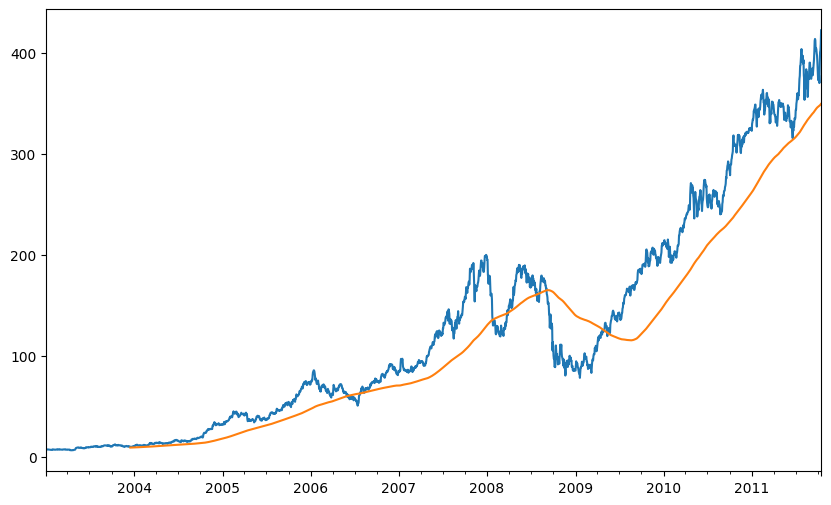

In [102]:
close_px["AAPL"].plot() # Vẽ biểu đồ giá cổ phiếu AAPL
close_px["AAPL"].rolling(250).mean().plot() # Tính trung bình động với cửa sổ 250 ngày và vẽ biểu đồ

### 35. Rolling std của pct_change

<Axes: >

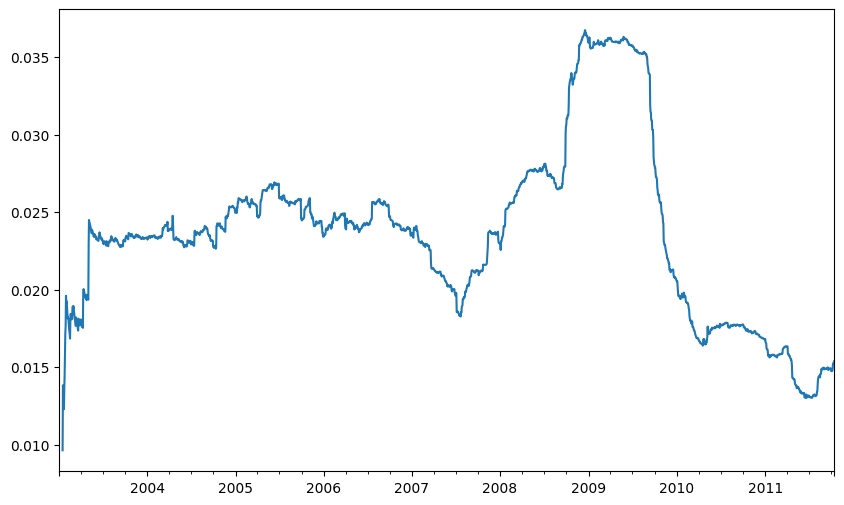

In [103]:
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std() # Tính độ lệch chuẩn của tỷ suất thay đổi với cửa sổ 250 ngày, yêu cầu tối thiểu 10 giá trị không phải NaN
std250[5:12] # Hiển thị các giá trị từ chỉ số 5 đến 11
std250.plot() # Vẽ biểu đồ độ lệch chuẩn

### 36. Expanding mean

In [104]:
expanding_mean = std250.expanding().mean()

### 37. Figure mới

In [105]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### 38. Plot rolling mean với style

<Axes: >

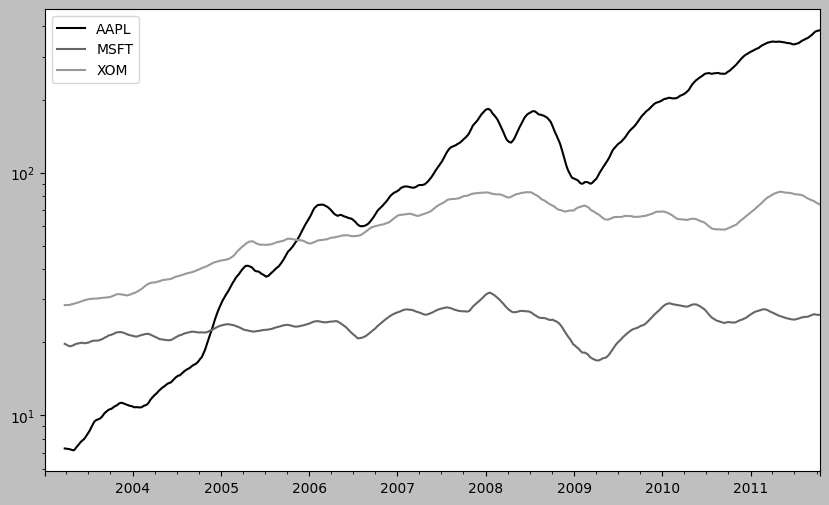

In [106]:
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

### 39. Rolling với freq string

In [107]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [108]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### 40 .So sánh MA và EWMA

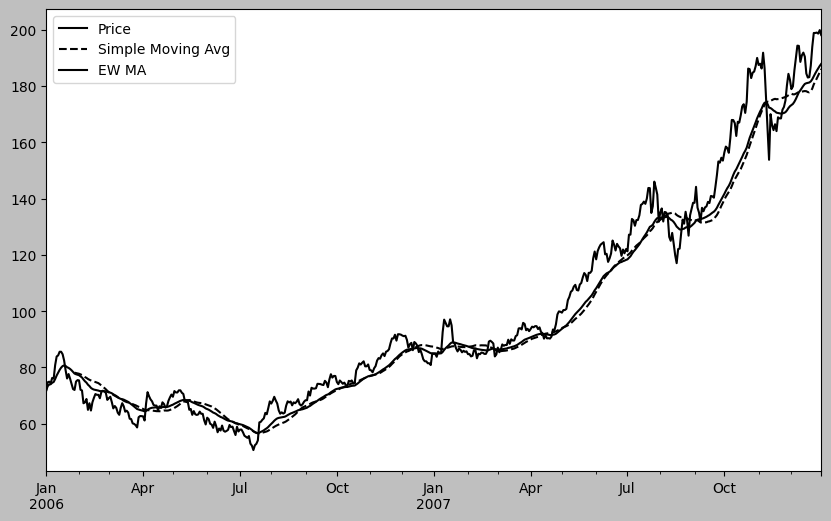

In [109]:
aapl_px = close_px["AAPL"]["2006":"2007"] # Lấy dữ liệu của AAPL từ năm 2006 đến 2007

ma30 = aapl_px.rolling(30, min_periods=20).mean() # Tính trung bình động với cửa sổ 30 ngày, yêu cầu tối thiểu 20 giá trị không phải NaN
ewma30 = aapl_px.ewm(span=30).mean() # Tính trung bình động mũ với span 30

aapl_px.plot(style="k-", label="Price") # Vẽ biểu đồ giá cổ phiếu AAPL
ma30.plot(style="k--", label="Simple Moving Avg") # Vẽ biểu đồ trung bình động đơn giản
ewma30.plot(style="k-", label="EW MA") # Vẽ biểu đồ trung bình động mũ
plt.legend() # Hiển thị chú thích biểu đồ

In [110]:
plt.figure() # Tạo một biểu đồ mới

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [111]:
spx_px = close_px_all["SPX"] # Lấy dữ liệu của chỉ số SPX
spx_rets = spx_px.pct_change() # Tính tỷ suất thay đổi của SPX
returns = close_px.pct_change() # Tính tỷ suất thay đổi của các cổ phiếu

<Axes: >

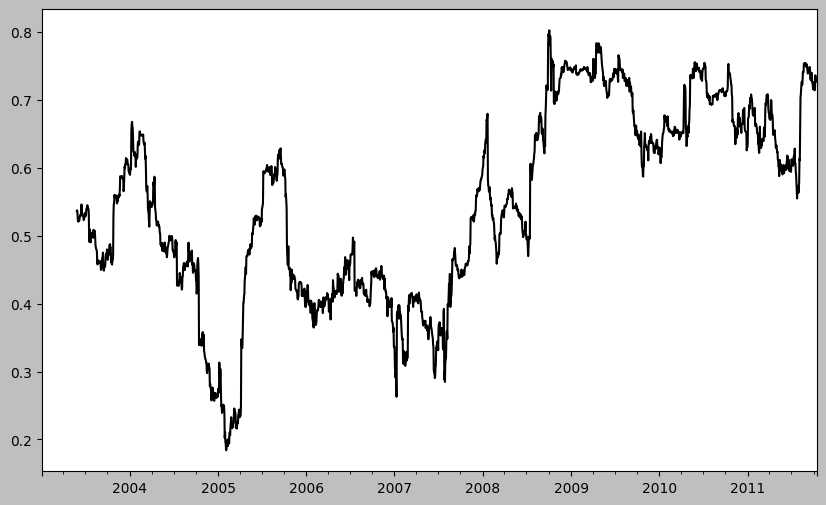

In [112]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets) # Tính hệ số tương quan động với cửa sổ 125 ngày giữa AAPL và SPX, yêu cầu tối thiểu 100 giá trị không phải NaN
corr.plot()

In [113]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

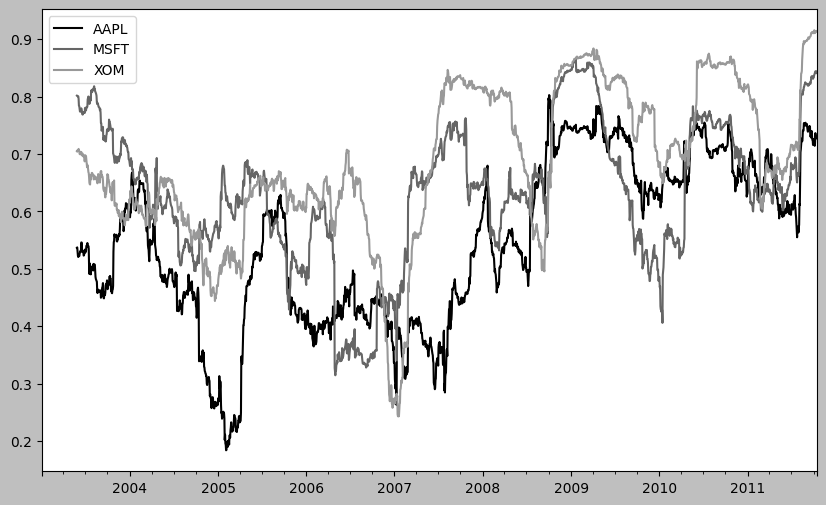

In [114]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets) # Tính hệ số tương quan động với cửa sổ 125 ngày giữa tất cả các cổ phiếu và SPX, yêu cầu tối thiểu 100 giá trị không phải NaN
corr.plot()

In [115]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### 41. Rolling apply custom function

<Axes: >

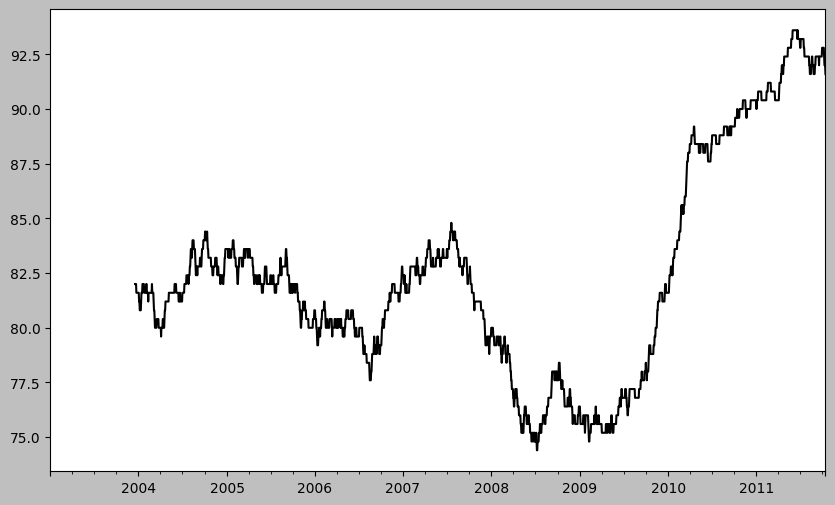

In [116]:
from scipy.stats import percentileofscore
def score_at_2percent(x): # Hàm tính phần trăm vị trí của 0.02 trong mảng x
    return percentileofscore(x, 0.02) 

result = returns["AAPL"].rolling(250).apply(score_at_2percent) # Áp dụng hàm score_at_2percent trên cửa sổ 250 ngày
result.plot()   

In [117]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS